# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

## 1. 분석의 목적과 변수 확인

## 2. 데이터 전체적으로 살펴보기

## 3. 데이터의 개별 속성 파악하기

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

#### 무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다:
1. 데이터를 톺아봅시다.  
    - 각 데이터는 어떤 자료형을 가지고 있나요?  
    - 데이터에 **결측치**는 없나요? -> 있다면 이를 어떻게 메꿔줄까요?  
    - 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
    - 가설은 명확할 수록 좋습니다 ex) *Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!*
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.  
    - `.groupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두개 이상의 dataFrame을 합치면 어떨까요?
    - 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for google drive
from google.colab import drive
drive.mount('/content/drive')

# my path
path = "/content/drive/MyDrive/Colab Notebooks/kdt/week3/train.csv"
titanic_df =  pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터 셋을 전체적으로 살펴보았다.

In [45]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


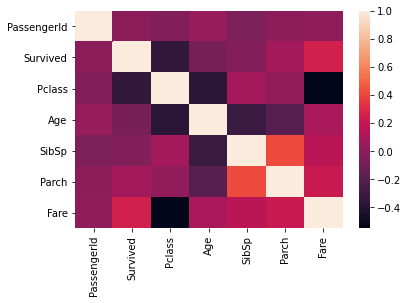

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [104]:
sns.heatmap(titanic_df.corr())
plt.show()
titanic_df.corr()

`Corr()` 를 통해 살펴보았을 때 유의미한 `feature`는 다음과 같다.

- `Pclass`와 `Survived`
- `Pclass`와 `Age`
- `Pclass`와 `Fare`
- `Pclass`와 `SibSp`
- `SibSp`와 `Age`
- `SibSp`와 `Parch`
- `Parch`와 `Fare`

분석의 목적은 생존(`Survived`)과 관련있는 `feature`를 찾는 것이므로, 유의미한 Feature은 `Pclass`이다.

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

지난 과제에서 사용하였던 [avocado Dataset](https://www.kaggle.com/neuromusic/avocado-prices) 을 사용하였습니다.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for google drive
from google.colab import drive
drive.mount('/content/drive')

# my path
path = "/content/drive/MyDrive/Colab Notebooks/kdt/week3/avocado.csv"
avocado =  pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


이 데이터셋의 목적은 여러개가 있지만 그중 아보카도의 가격을 예측하는 `Avocado Price Prediction`으로 설정하였습니다.

이 데이터셋의 변수는 다음과 같습니다.

- Date: 날짜 
- AveragePrice: 평균 가격 
- Total Volume: 총 판매량 
- 4046: 숙성단계가 4046인 아보카도 판매량 
- 4225: 숙성단계가 4225인 아보카도 판매량
- 4770: 숙성단계가 4770인 아보카도 판매량  
- Total Bags      float64
- Small Bags      float64
- Large Bags      float64
- XLarge Bags     float64
- type: 유기농인지 아닌지 
- year: 연도
- region: 도시 또는 지역

In [85]:
avocado.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [86]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


변수들의 상관관계는 다음과 같다.

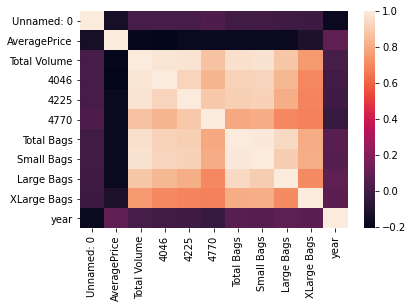

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [15]:
sns.heatmap(avocado.corr())
plt.show()
avocado.corr()

null 값은 존재하지 않는것을 확인했다.

In [19]:
avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Feature 1: 유기농의 여부

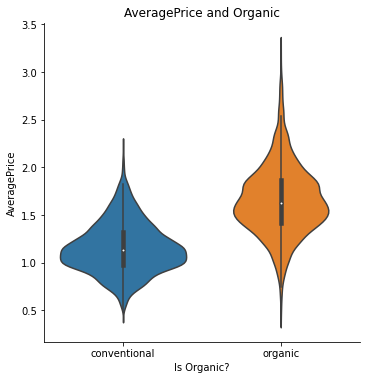

In [202]:
sns.catplot(x='type', y='AveragePrice', data=avocado, kind='violin')
plt.xlabel('Is Organic?')
plt.title("AveragePrice and Organic")
plt.show()

그래프에 의하면 유기농일 때(organic), 그렇지 않을 때보다(conventional) 대체로 높은 가격인 것으로 나타났다. 또 유기농일 때는 최댓값이 매우 높게 책정되어있는데 비해 그렇지 않을 떄는 낮은 가격대에 많이 분포하고있다.

### Feature 2: 지역

In [146]:
avocado_price = avocado.groupby(['region'])['AveragePrice']
avocado_price_max = avocado_price.max().sort_values()
avocado_price_mean = avocado_price.mean().sort_values()
avocado_price_min = avocado_price.min().sort_values()
avocado_price_median = avocado_price.median().sort_values()

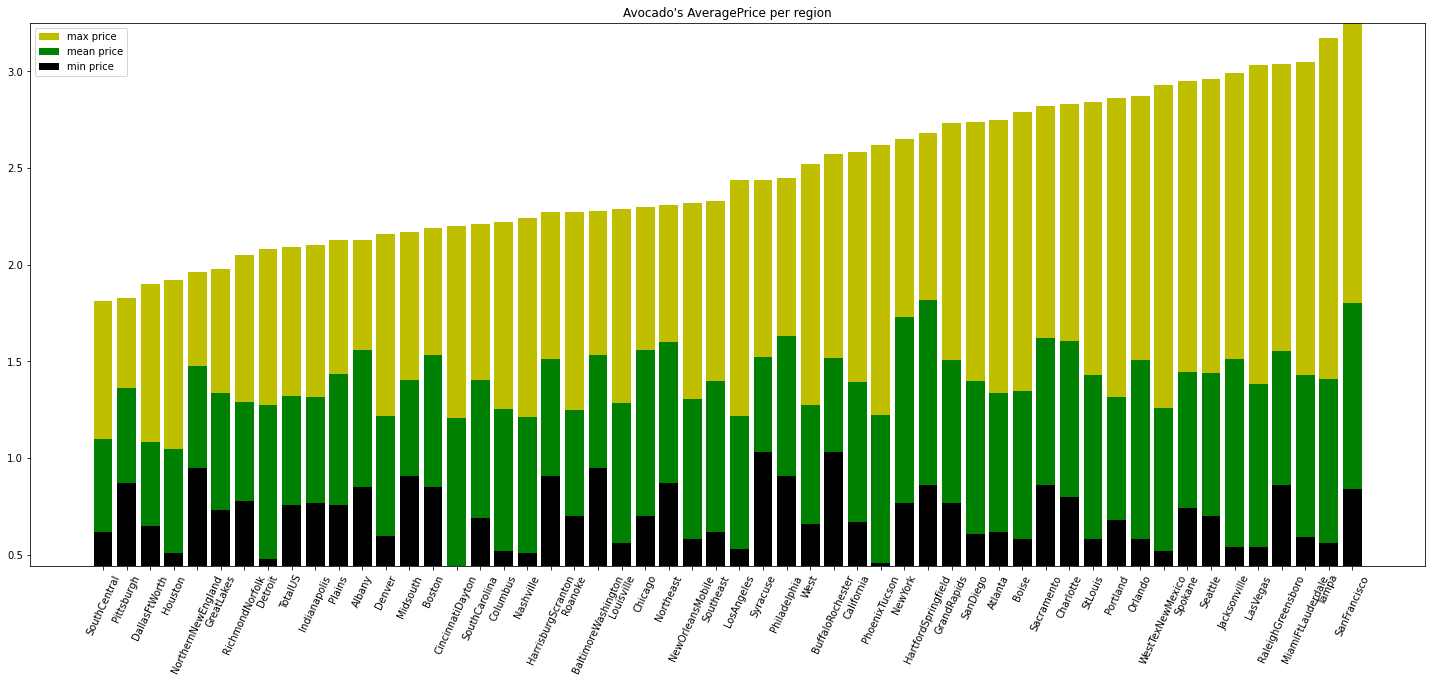

In [144]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=65)
plt.title("Avocado's AveragePrice per region")
plt.axis(ymin=avocado_price_min.min(),ymax=avocado_price_max.max())
plt.bar(avocado_price_max.index, avocado_price_max.values, color='y')
plt.bar(avocado_price_mean.index, avocado_price_mean.values, color='g')
plt.bar(avocado_price_min.index, avocado_price_min.values, color='k')
plt.legend(['max price', 'mean price', 'min price'])
plt.show()

위 그래프는 아보카도의 평균 가격에 대한 최댓값, 평균값, 최솟값 그래프이다.  `Sanfrancisco`, `Tampa`, `MiamiFtLauderdale`, `RaleighGreensboro`, `LaasVegas`가 순서대로 상위권을 차지하였다.

다만 그래프에서 볼 수 있듯이 아보카도의 최고값이 높다고 해서 평균값이나 최솟값도 높지는 않은 것으로 보인다.

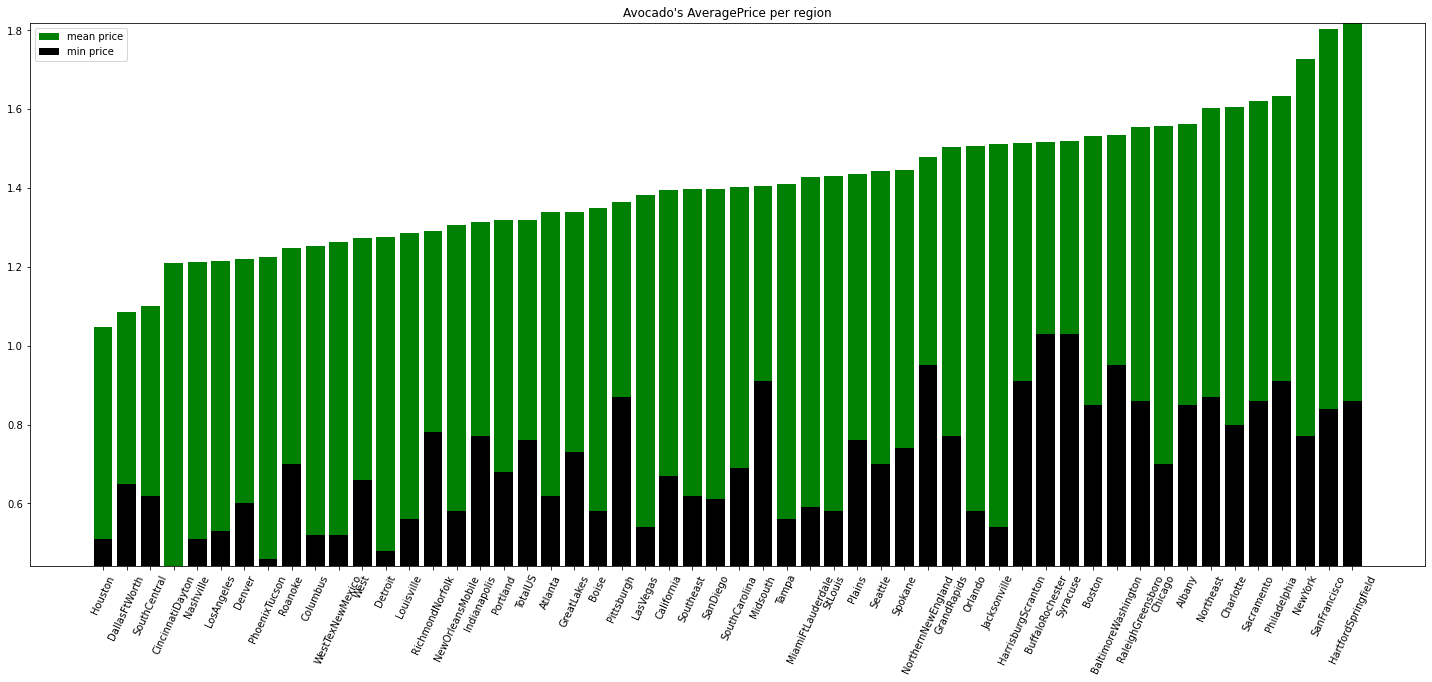

In [132]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=65)
plt.title("Avocado's AveragePrice per region")
plt.axis(ymin=avocado_price_min.min(),ymax=avocado_price_mean.max())
plt.bar(avocado_price_mean.index, avocado_price_mean.values, color='g')
plt.bar(avocado_price_min.index, avocado_price_min.values, color='k')
plt.legend(['mean price', 'min price'])
plt.show()

다음으로 평균값과 최솟값에 대한 그래프이다. `HartfordSpringfield`, `Sanfrancisco`, `NewYork`, `Philadelphia`, `Sacramento`가 순서대로 상위권을 차지하였다.

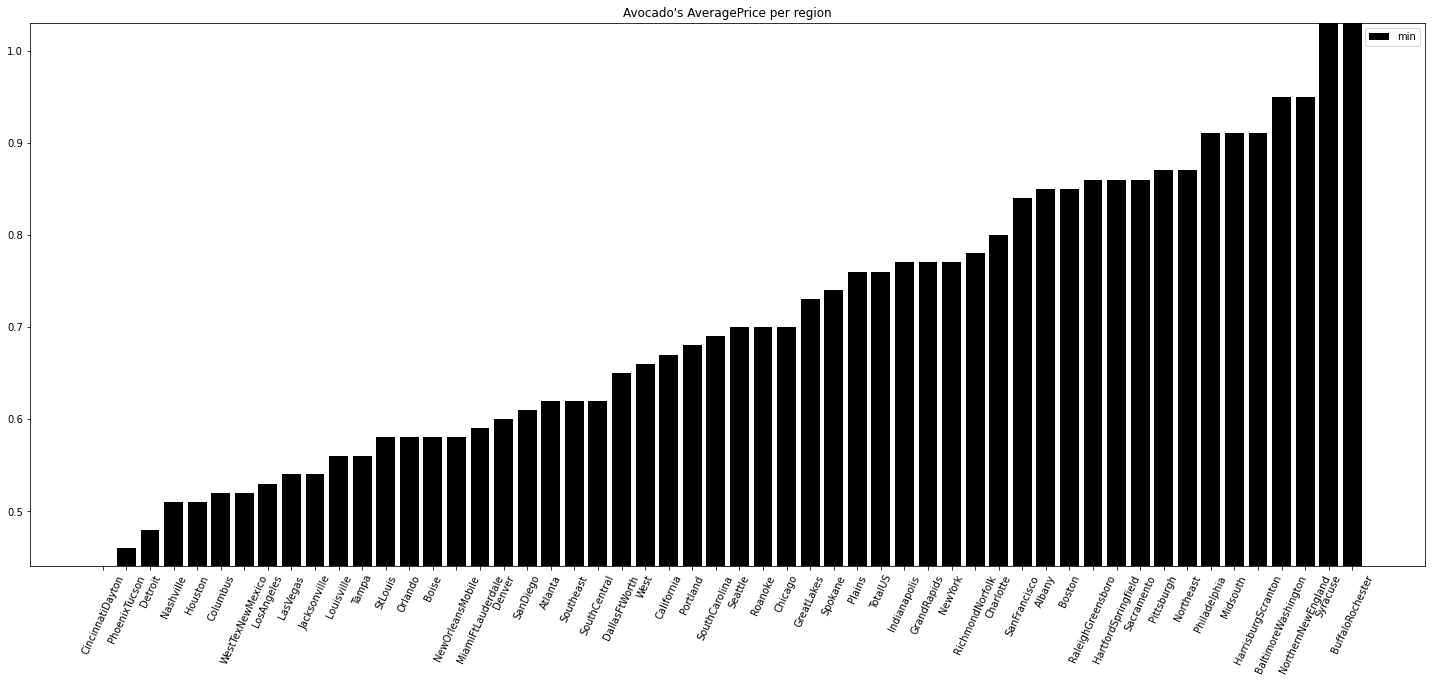

In [133]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=65)
plt.title("Avocado's AveragePrice per region")
plt.axis(ymin=avocado_price_min.min(),ymax=avocado_price_min.max())
plt.bar(avocado_price_min.index, avocado_price_min.values, color='k')
plt.legend(['min', 'price'])
plt.show()

다음으로 최솟값에 대한 그래프이다. `BuffaloRochester`, `Syracuse`, `NorthernNewEngland`, `BaltimoreWashington`, `HarrisburgScranton` 이 상위권을 차지하였다.

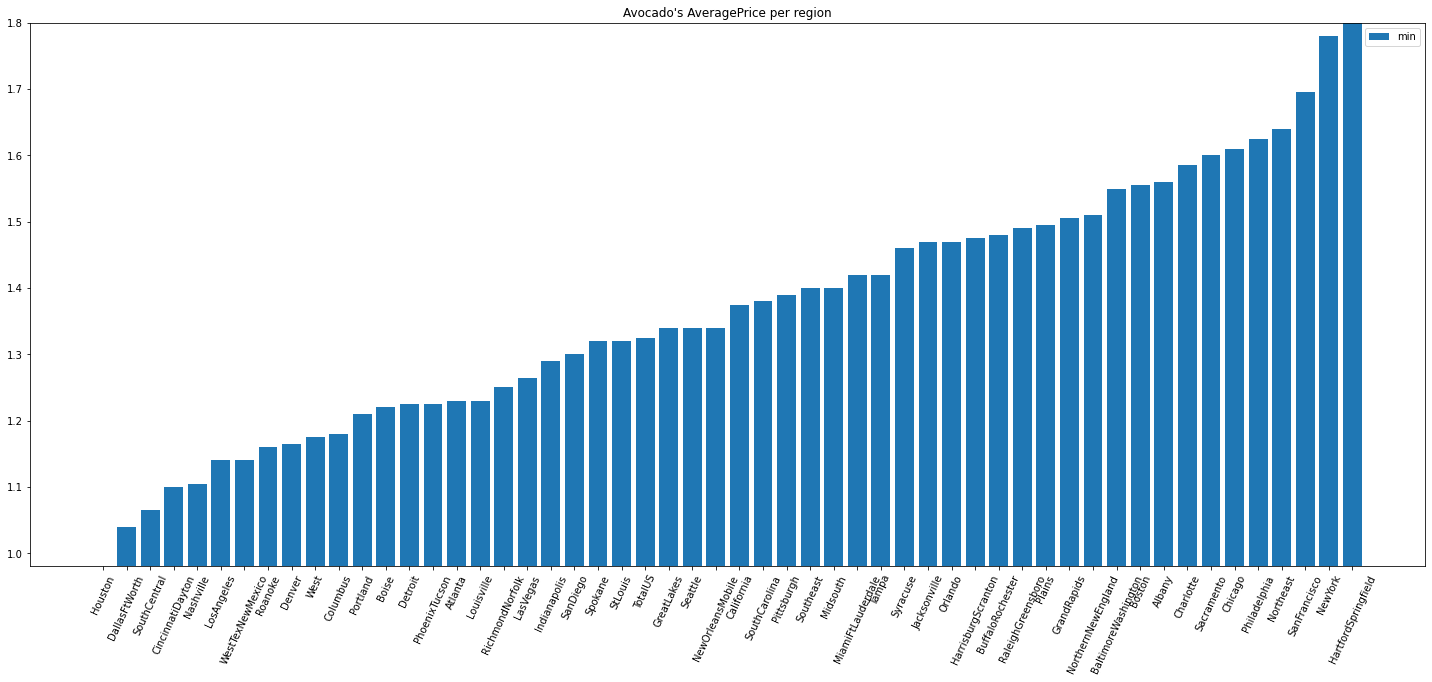

In [147]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=65)
plt.title("Avocado's AveragePrice per region")
plt.axis(ymin=avocado_price_median.min(),ymax=avocado_price_median.max())
plt.bar(avocado_price_median.index, avocado_price_median.values)
plt.legend(['min', 'price'])
plt.show()

중간값을 사용했을 때는 `HartfordSpringfield`, `NewYork`, `Sanfrancisco`, `Northeast`, `Philadelphia`가 상위권을 차지하였다.

### Feature 3: 아보카도를 판매한 시간

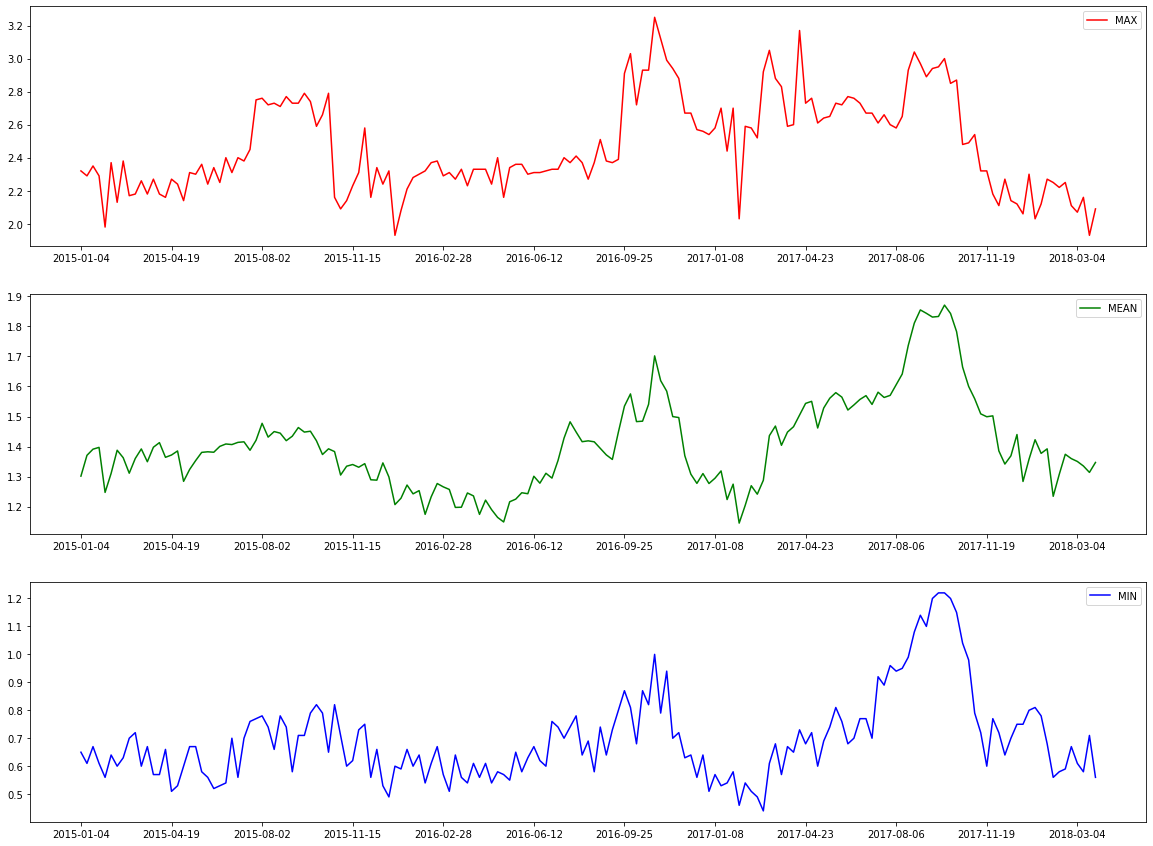

In [191]:
avocado_time = avocado.groupby('Date')['AveragePrice']
plt.figure(figsize=(20,15))
plt.axis(ymin=avocado_time.min().min(), ymax=avocado_time.max().max())
plt.subplot(3,1,1)
plt.xticks([i for i in range(0,len(avocado_time),15)])
plt.plot(avocado_time.max(), color='r')
plt.legend(['MAX'])
plt.subplot(3,1,2)
plt.xticks([i for i in range(0,len(avocado_time),15)])
plt.plot(avocado_time.mean(), color='g')
plt.legend(['MEAN'])
plt.subplot(3,1,3)
plt.xticks([i for i in range(0,len(avocado_time),15)])
plt.plot(avocado_time.min(), color='b')
plt.legend(["MIN"])
plt.show()

시간을 보았을 때 아보카도의 평균가격은 최대, 평균, 최소 할거없이 대체로 일정한 모습을 하고 있다. 그래프에 의하면 2016년 하반기, 2017년 하반기에 아보카도 평균 가격이 높았고 2016, 2017, 2018년도 상반기에는 아보카도의 평균 가격이 낮았다. 아보카도 제철이 8월에서 10월인 점을 고려했을 때 아보카도는 제철일 떄 대체로 비쌌다고 할 수 있다.